<a href="https://colab.research.google.com/github/youngjinjae/pythontest/blob/main/0728_CNN(%EA%B8%B0%EB%B3%B8)_%EC%9D%B4%EB%AF%B8%EC%A7%803%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 모듈 import

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img


(429, 640, 3)
(1, 429, 640, 3)


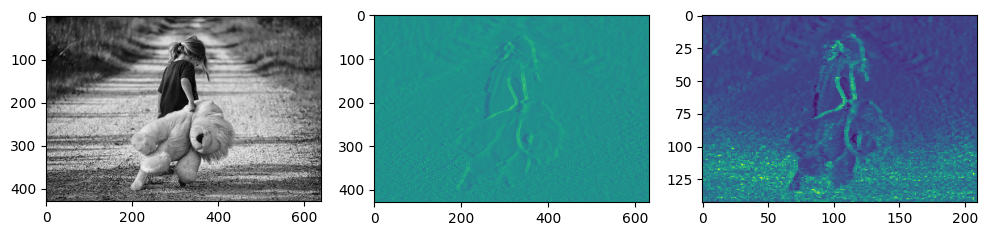

In [ ]:
# 이미지 3개를 비교해서 확인할거다.
# matplotlib의 figure를 이용해서 그림 3개가 들어갈 영역 만들기
fig = plt.figure(figsize=(10,10))
 # 하나만 그림 그릴거 아니면 쓰지 않음 여러 그림으로 인해 사용, 10인치 10인치

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# 이대로 실행하면 x,y 축 그림 그려짐

ori_image = img.imread('/content/girl-teddy.jpg')
ax1.imshow(ori_image)
print(ori_image.shape) #(429, 640, 3) 갯수 3차원

# convolution 연산을 수행하려면 다시 말해서 API를 이용해서 이 작업을 하려면
# 입력되는 이미지가 4차원
# 입력 이미지의 형태

# (이미지의 개수, height, width, color) => (1,429, 640, 3) 4차원으로
input_image = ori_image.reshape((1,) + ori_image.shape) #((1,)+429, 640, 3) 한차원 더하기

print(input_image.shape)  #(1, 429, 640, 3) 차원 늘려짐
input_image = input_image.astype(np.float32) # s타입을 데이터 변환 시키기 32bit 실수형 변환

#### conv연산 임
channel_1_input_image = input_image[:,:,:,0:1] #sling
# filter 필터 준비
# filter 형태 => (filter height,filter width,filter channel,filter 개수)
# (filter height =3 ,filter width =3 ,filter channel = 1 ,filter 개수 =1 )
weight = np.array([[[[-1]],[[0]],[[1]],
                   [[-1]],[[0]],[[1]],
                   [[-1]],[[0]],[[1]]]])
#stride = 1
# padding = valid
conv2d = tf.nn.conv2d(channel_1_input_image,
                     weight,
                     strides=[1,1,1,1],
                     padding='VALID')
# Conv2d 가 만들어진다. 4차원 (첫번째 이미지의 개수
conv2d_result=conv2d[0,:,:,:]
ax2.imshow(conv2d_result)

# pooling 처리를 해보아요.
pool = tf.nn.max_pool(conv2d,
                      ksize=[1,3,3,1],
                      strides=[1,3,3,3],
                      padding='VALID').numpy()
pool_img = pool[0,:,:,:]
ax3.imshow(pool_img)
fig.tight_layout()
plt.show()





